In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import random
import math
from PIL import Image


from skimage.io import imread, imshow
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv

In [2]:
def getMatrix(width,height):
    i=0
    j=0
    while i<height:
        while j<width:
            #print('i=',i)
            #print('j=',j)
            I[i,j]=img.getpixel((i,j))[0]
            j+=1
        j=0
        i+=1


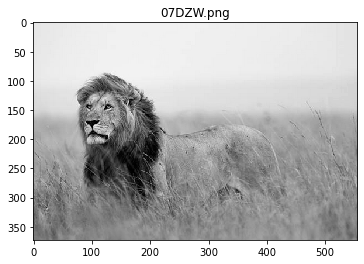

Image size(height*width) :  373 * 556
Matrix PXL :
 [[226 226 226 ... 223 223 223]
 [226 226 226 ... 223 223 223]
 [226 226 226 ... 223 223 223]
 ...
 [120 121 121 ... 117 113 114]
 [121 121 121 ... 120 116 116]
 [120 120 120 ... 121 118 118]]


C:\Users\Biswarup Mistry\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


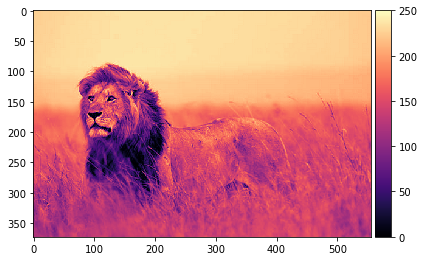

In [3]:
img=Image.open(r'C:\Users\Biswarup Mistry\Downloads\07DZW.png')
#px=img.load()
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.title('07DZW.png')
plt.show()
size=width, height= img.size
#print(img.size)
print('Image size(height*width) : ',height,'*',width)
#I=np.matrix(np.arange(width*height).reshape(width, height))
I =list(img.getdata())
I = np.matrix(I).reshape(height,width)
#getMatrix(width,height)
print('Matrix PXL :\n',I)
imshow(I, cmap='magma')

In [4]:
def EntropyOfImage():
    a=[] #for taking every pixels into a single array
    d=[] #array of probaililities of all probable pixles (From 0 to 255)
    pr=[] #array of counting
    logP=[] #log2(pr[i])
    mul_result=[] #pi*log2(pi)

    # taking pixels' valus to an single array
    i=j=0
    while i<height: 
        j=0
        while j<width:
            a.append(I[i,j])
            j+=1
        i+=1
    #print('a : ',a)

    #counting of pixels
    i=0
    count=0
    while i<256:
        count=0
        for item in a:
            if i==item:
                count+=1
        pr.append(count)
        i+=1
    #print('pr : ',pr)
    #print('sum of pr : ',np.sum(pr))
    
    #probability of Pixels   
    i=0
    while i<256:
        d.append(pr[i]/(height*width))
        i+=1

    #print('d : ',d)

    #log2(pi)    
    i=0
    while i<256:
        if(d[i]!=0):
            logP.append(np.log2(d[i]))
        else:
            logP.append(0)
        i+=1
    #print('logP : ',logP)    

    #pi*log2(pi)    
    i=0
    while i<256:
        if(pr[i]!=0):
            mul_result.append(d[i]*logP[i])
        i+=1
    #print('mul_result : ',mul_result)    

    e=-np.sum(mul_result)

    #print('Entropy : ',e)

    return(e) #returning the entropy 'e' of the Image 

In [5]:
e=EntropyOfImage()
print('Image Entropy : ',e)

Image Entropy :  7.07811607690412


C:\Users\Biswarup Mistry\AppData\Local\Temp\ipykernel_7868\3250005126.py:1: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_image = entropy(I, disk(4))
C:\Users\Biswarup Mistry\anaconda3\lib\site-packages\skimage\util\dtype.py:541: UserWarning: Downcasting int32 to uint8 without scaling because max value 250 fits in uint8
  return _convert(image, np.uint8, force_copy)
C:\Users\Biswarup Mistry\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


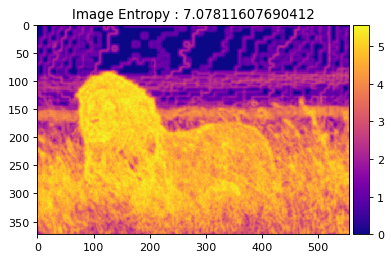

In [6]:
entropy_image = entropy(I, disk(4))
plt.figure(num=None, figsize=(5, 5), dpi=80)
plt.title('Image Entropy : '+str(e))
imshow(entropy_image, cmap = 'plasma')

In [7]:
def entropy1(im):
    # Compute normalized histogram -> p(g)
    p = np.array([(im==v).sum() for v in range(256)])
    p = p/p.sum()
    # Compute e = -sum(p(g)*log2(p(g)))
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    
    return e

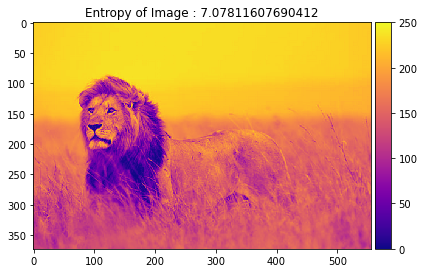

In [9]:
plt.title('Entropy of Image : '+str(entropy1(I)))
imshow(I,cmap='plasma')
plt.show()